In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 15, 6 
import seaborn as sns

In [2]:
import sys
print(sys.executable)


C:\ProgramData\anaconda3\python.exe


In [3]:
# Membaca data saham dari file CSV
data = pd.read_csv('c:/Data/^JKSE.csv',  delimiter=',')

# Menampilkan data
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,6313.127930,6317.013184,6263.675781,6283.581055,6283.581055,33043700
1,2020-01-03,6306.187012,6323.465820,6287.706055,6323.465820,6323.465820,44625300
2,2020-01-06,6293.499023,6300.436035,6252.634766,6257.402832,6257.402832,41421300
3,2020-01-07,6272.220215,6284.892090,6246.128906,6279.346191,6279.346191,39441600
4,2020-01-08,6248.442871,6250.122070,6218.129883,6225.686035,6225.686035,44622600
...,...,...,...,...,...,...,...
969,2023-12-21,7222.092773,7229.288086,7173.007813,7209.619141,7209.619141,144347800
970,2023-12-22,7225.620117,7248.547852,7218.174805,7237.519043,7237.519043,111284900
971,2023-12-27,7256.158203,7293.524902,7239.663086,7245.916016,7245.916016,124953000
972,2023-12-28,7266.568848,7308.205078,7262.253906,7303.888184,7303.888184,123036000


In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
data = data.drop(['Open','Low','High','Adj Close','Volume'],axis='columns')

In [8]:
print(data.dtypes)

Date      object
Close    float64
dtype: object


In [9]:
data

,Date,Close
0,2020-01-02,6283.581055
1,2020-01-03,6323.465820
2,2020-01-06,6257.402832
3,2020-01-07,6279.346191
4,2020-01-08,6225.686035
...,...,...
969,2023-12-21,7209.619141
970,2023-12-22,7237.519043
971,2023-12-27,7245.916016
972,2023-12-28,7303.888184


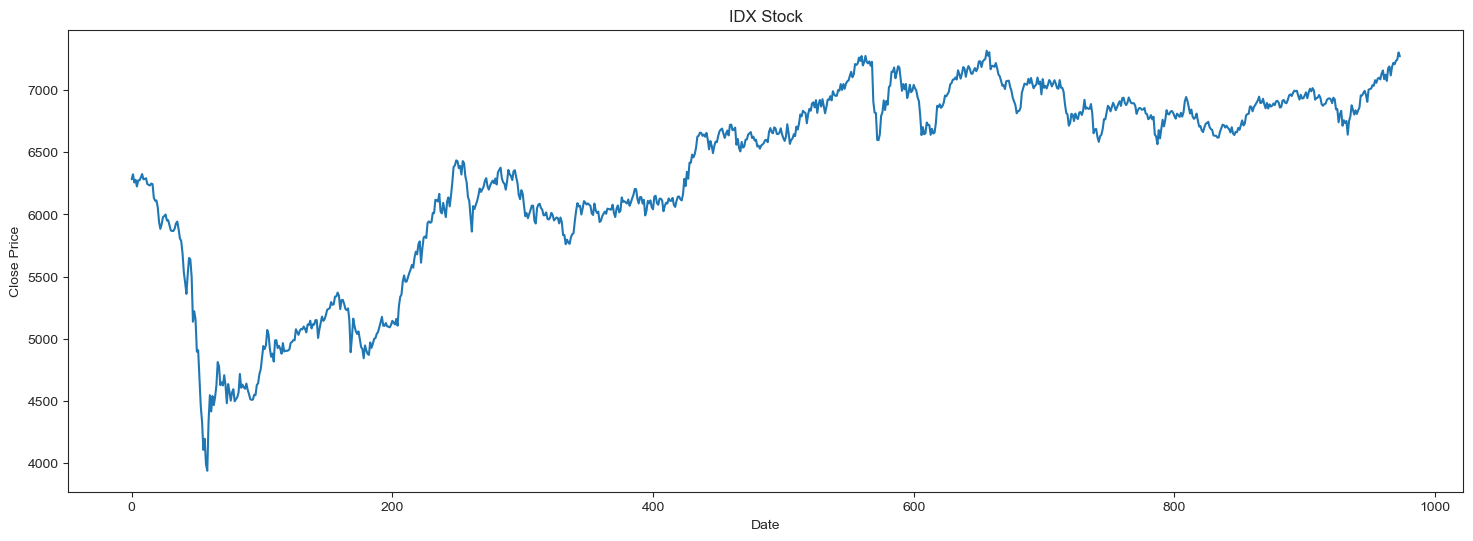

In [10]:
# Visualisasi dataset setelah normalisasi
plt.figure(figsize=(18,6))
sns.set_style('ticks')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('IDX Stock')
plt.plot(data.index, data['Close'])
plt.show()

In [11]:
data = data.rename(columns={'Date': 'ds', 'Close': 'y'})

In [12]:
data = data.reset_index().rename(columns={data.index.name:'ds'})

In [13]:
data

,index,ds,y
0,0,2020-01-02,6283.581055
1,1,2020-01-03,6323.465820
2,2,2020-01-06,6257.402832
3,3,2020-01-07,6279.346191
4,4,2020-01-08,6225.686035
...,...,...,...
969,969,2023-12-21,7209.619141
970,970,2023-12-22,7237.519043
971,971,2023-12-27,7245.916016
972,972,2023-12-28,7303.888184


In [14]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import pandas as pd
from prophet import Prophet

# Create and fit Prophet model to training data
prophet_model = Prophet()
# Split data into train and test sets (90;10)
train_data, test_data = train_test_split(data, test_size=0.1, shuffle=False)

In [15]:
prophet_model = Prophet()
prophet_model.fit(train_data)

15:19:40 - cmdstanpy - INFO - Chain [1] start processing
15:19:41 - cmdstanpy - INFO - Chain [1] done processing


C:\Users\Luckystia Mafasani\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Luckystia Mafasani\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Prophet
Training data length: 876
Test data length: 98
MAPE of the forecast: 0.02%


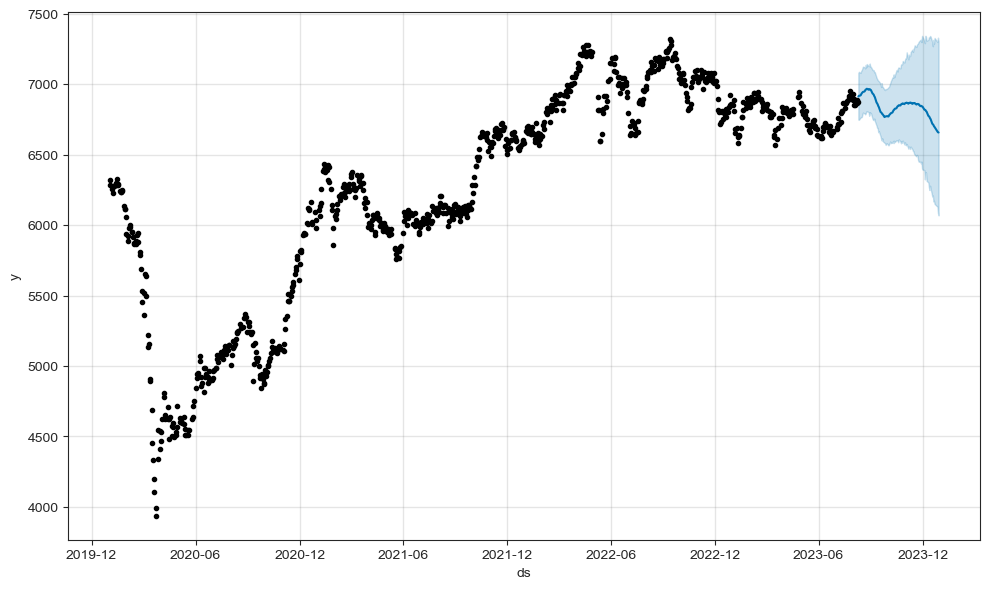

In [16]:
# Make predictions on test data using Prophet model
forecast = prophet_model.predict(test_data[['ds']])

# Compute MAPE of the forecast
mape = mean_absolute_percentage_error(test_data['y'], forecast['yhat'])

# Print summary of results
print(f'Prophet')
print(f'Training data length: {len(train_data)}')
print(f'Test data length: {len(test_data)}')
print(f'MAPE of the forecast: {mape:.2f}%')

# Plot the Prophet forecast
fig = prophet_model.plot(forecast)
plt.show()

In [17]:
import numpy as np

# Compute MAPE of the forecast using Prophet's built-in function
mape_prophet = np.mean(np.abs((test_data['y'].values - forecast['yhat'].values) / test_data['y'].values)) * 100

# Print summary of results
print(f'Prophet')
print(f'Training data length: {len(train_data)}')
print(f'Test data length: {len(test_data)}')
print(f'MAPE of the forecast: {mape_prophet:.2f}%')


Prophet
Training data length: 876
Test data length: 98
MAPE of the forecast: 2.21%
